In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [3]:
Toyoto_Corrola=pd.read_csv("D:\\DATA SCIENCE\\Data sets\\day14\\Toyoto_Corrola.csv")
Toyoto_Corrola.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


## Perform EDA

In [4]:
Toyoto_Corrola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [5]:
Toyoto_Corrola.isna().sum() #ckeck null values

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
data=Toyoto_Corrola.copy()  #copying data for secuer original

In [7]:
data=data.drop(['Id','Model','Cylinders'],axis=1) #dorp columns Id and Model

In [8]:
data=data.rename({'Age_08_04':'Age'},axis=1) #rename the column

In [9]:
data

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,5,1025
1432,10845,72,19000,86,3,5,1015
1433,8500,71,17016,86,3,5,1015
1434,7250,70,16916,86,3,5,1015


In [10]:
data.corr() #correlatin matrix

,Price,Age,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,0.020613,1.000000


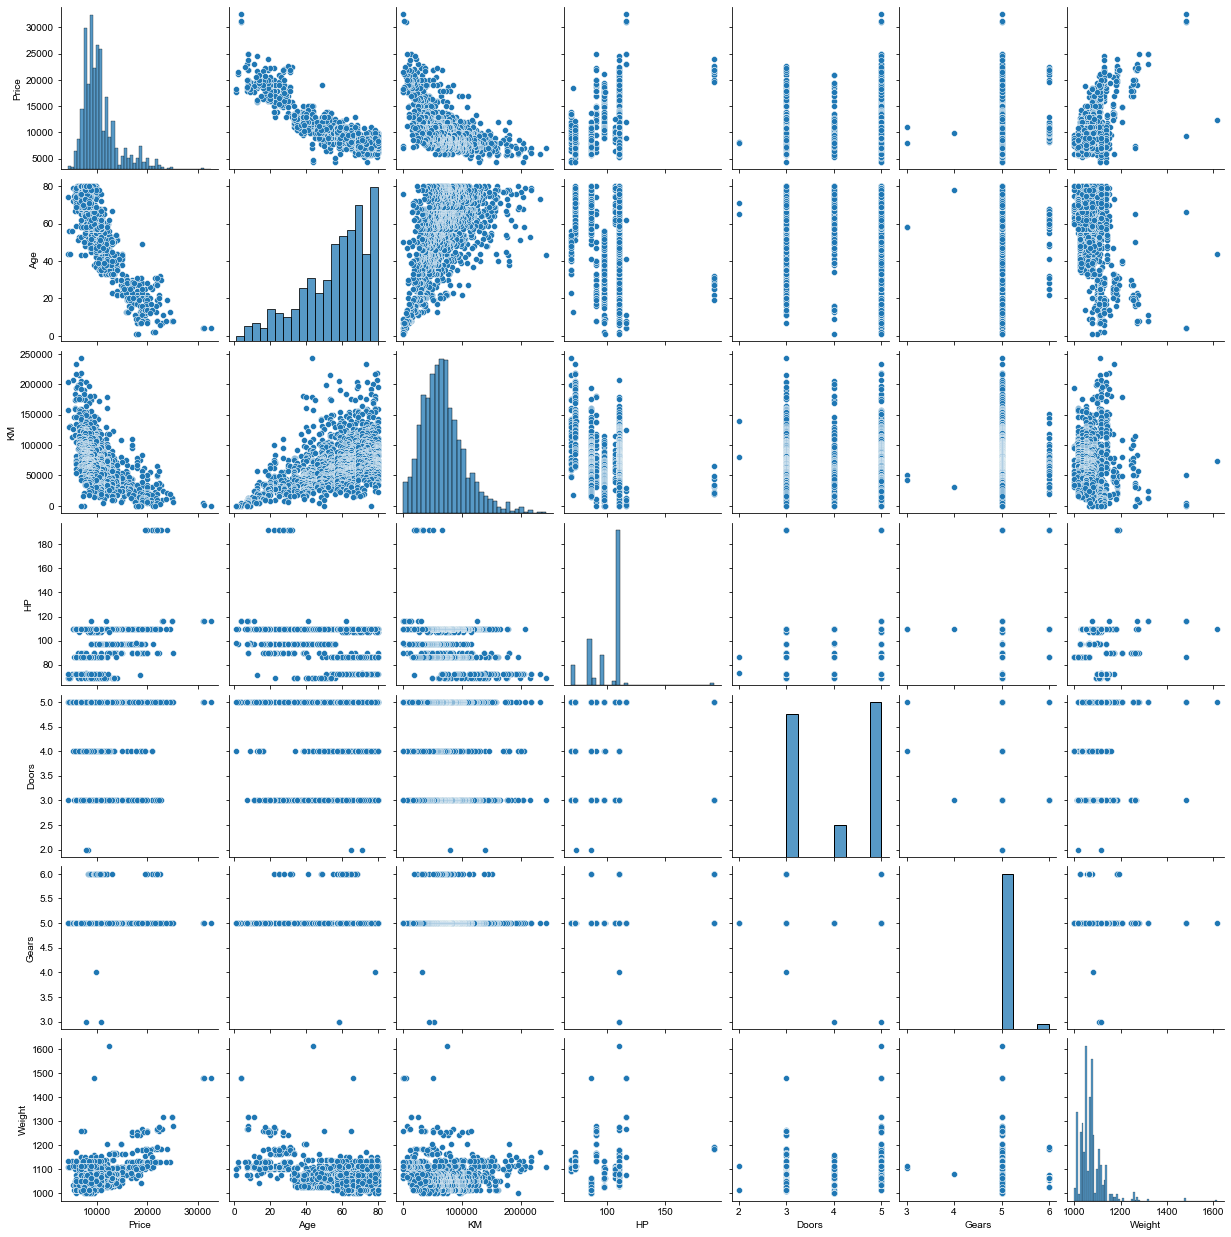

In [11]:
# scatter plot between variables and histogram
sns.pairplot(data)
sns.set_style(style='darkgrid')

## Prepare a model

In [33]:
#Build a model
model=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=data).fit()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:55:01   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6984.3736   1312.036     -5.323      0.000   -9558.097   -4410.650
Age         -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
Weight        18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     2.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model.params #coefficients

Intercept   -6984.373566
Age          -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Gears         622.282925
Weight         18.609651
dtype: float64

In [15]:
# t and p values
print(model.tvalues,model.pvalues)

Intercept    -5.323309
Age         -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Gears         3.152234
Weight       22.446903
dtype: float64 Intercept     1.181900e-07
Age          4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [16]:
# R-squared values
(model.rsquared,model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

### Simple Linear Regression

In [17]:
import statsmodels.formula.api as smf
ml_d=smf.ols('Price~Doors',data=data).fit()

In [18]:
ml_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           1.46e-12
Time:                        20:39:43   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# t and p values
print(ml_d.tvalues,ml_d.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [20]:
#calculate VIF for Doors
rsq_d=smf.ols('Doors~Age+KM+HP+Gears+Weight',data=data).fit().rsquared
vif_d=1/(1-rsq_d)
vif_d

1.1493006316049685

## Residual analysis

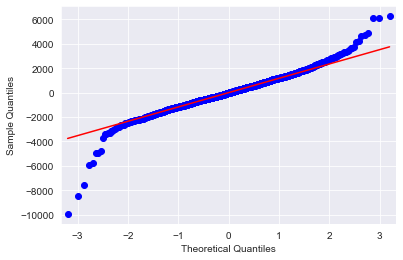

In [26]:
#Normality Q-Q plot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.show()

In [27]:
list(np.where(model.resid>6000))

[array([109, 147, 523], dtype=int64)]

In [48]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

## Residual plot for Homoscedasticity  (check canstant variance of error)

In [35]:
def get_standardized_values (vals):
    return (vals-vals.mean())/vals.std()

Text(0, 0.5, 'reeors')

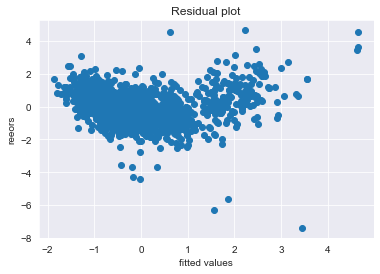

In [40]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual plot");plt.xlabel("fitted values");plt.ylabel("reeors")

#### erroe vsregression(indivisually)

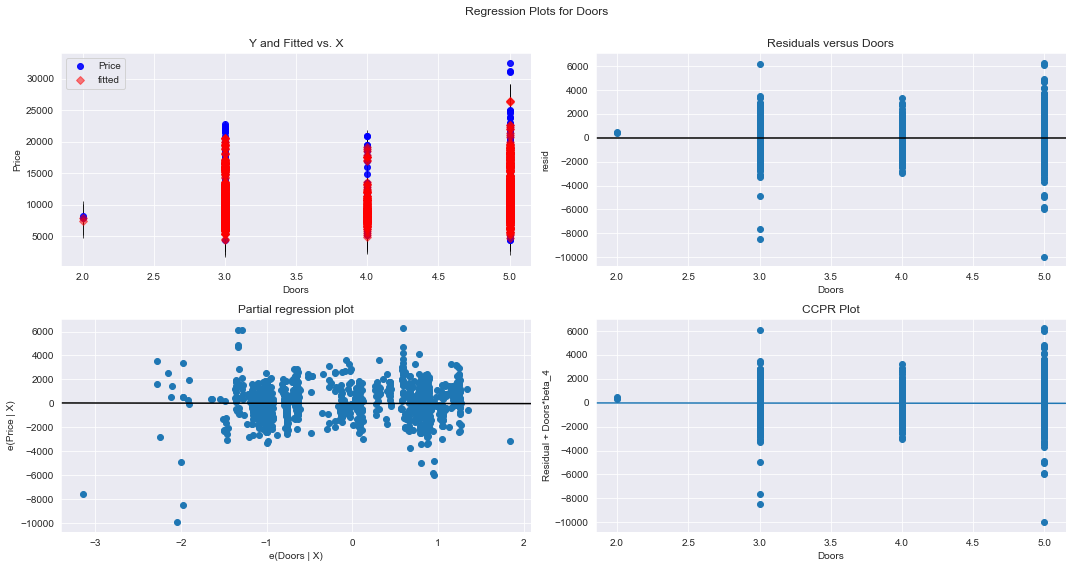

In [44]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

### We see that "Doors" have no significant (bcz no slops)

## Model Deletion Dignostics

<StemContainer object of 3 artists>

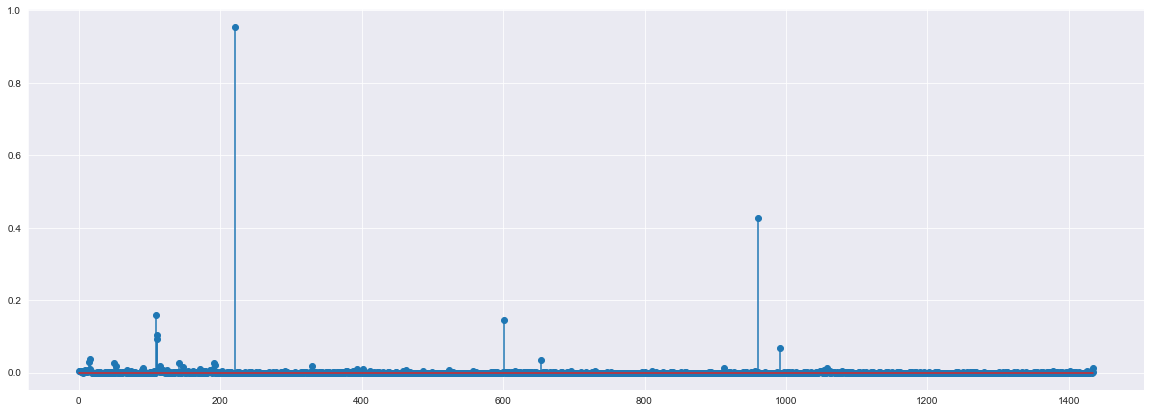

In [46]:
#deleting influences/outliers
# Cook's distance
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))


## High influence plot

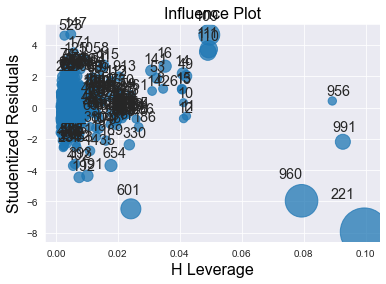

In [53]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [54]:
k=data.shape[1]  #no. of inputs
n=data.shape[0]  #no. of obs
leverage_cutoff=3*(k+1)/n

In [55]:
leverage_cutoff

0.016713091922005572

In [60]:
data[data.index.isin([106,147,523,221,601,960,991,956,1435])]

,Price,Age,KM,HP,Doors,Gears,Weight
106,18800,14,11500,110,3,5,1045
147,24500,13,19988,110,5,5,1130
221,12450,44,74172,110,5,5,1615
523,18950,49,49568,110,3,5,1105
601,7500,50,1,90,3,5,1260
956,10950,58,51421,110,5,3,1105
960,9390,66,50806,86,3,5,1480
991,7950,58,43000,110,4,3,1114
1435,6950,76,1,110,5,5,1114


In [61]:
data

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,5,1025
1432,10845,72,19000,86,3,5,1015
1433,8500,71,17016,86,3,5,1015
1434,7250,70,16916,86,3,5,1015


In [62]:
data=data.drop(data.index[[106,147,523,221,601,960,991,956,1435]],axis=0).reset_index()

In [63]:
data=data.drop(['index'],axis=1)

In [64]:
data

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1422,8450,80,23000,86,3,5,1015
1423,7500,69,20544,86,3,5,1025
1424,10845,72,19000,86,3,5,1015
1425,8500,71,17016,86,3,5,1015


In [65]:
final_ml=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=data).fit()
(final_ml.rsquared,final_ml.aic)

(0.8811424519877975, 24396.714073970204)

In [66]:
final_ml=smf.ols('Price~Age+KM+HP+Gears+Weight',data=data).fit()
(final_ml.rsquared,final_ml.aic)

(0.880800355765105, 24398.81537115186)

<StemContainer object of 3 artists>

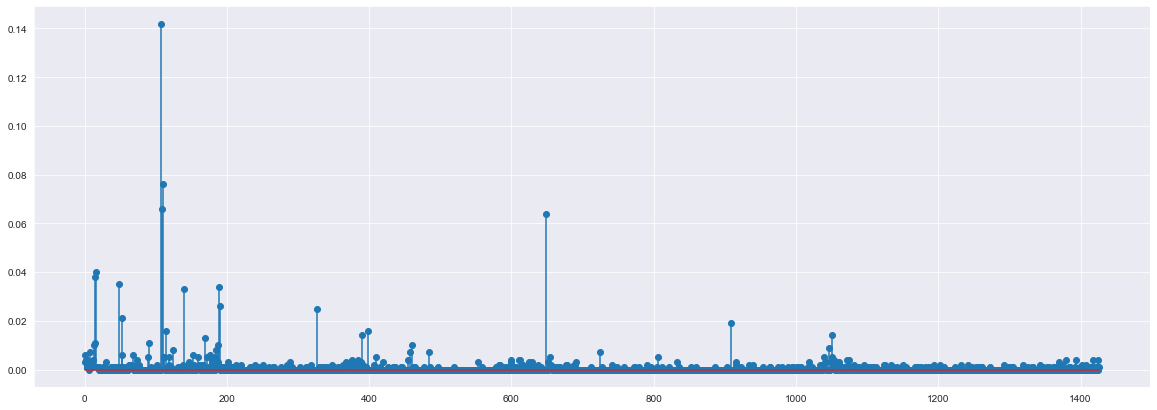

In [68]:
# Cook's distance
final_ml_influence=final_ml.get_influence()
(c,_)=final_ml_influence.cooks_distance
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))

### We see that no need to drop obs(all<0.5)

In [70]:
#predicting for new data points
newdata=pd.DataFrame({'Age':25,'KM':15000,'HP':85,'Doors':4,'Gears':5,'Weight':1000},index=[1])

In [71]:
newdata

,Age,KM,HP,Doors,Gears,Weight
1,25,15000,85,4,5,1000


In [72]:
final_ml.predict(newdata)

1    13328.154235
dtype: float64

In [75]:
final_ml.predict(data.iloc[0:5,])

0    16788.872110
1    16197.175059
2    16796.500462
3    16427.818718
4    16310.056927
dtype: float64

In [76]:
final_ml.predict(data)

0       16788.872110
1       16197.175059
2       16796.500462
3       16427.818718
4       16310.056927
            ...     
1422     7324.885078
1423     8852.395566
1424     8317.243635
1425     8475.124469
1426     8590.049069
Length: 1427, dtype: float64